# Overview Materi

Jelaskan secara singkat perbedaan antara bagging dan boosting menurut pemahamanmu!

Bagging = model paralel dan mengurangi varians.

Boosting = model berurutan dan mengurangi bias.

# Import Data & Libraries

In [ ]:
# import semua libraries yang akan dibutuhkan
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# import data dari datasets.load_breast_cancer
data = load_breast_cancer()

# subsetting data
X = data.data
y = data.target

# split data dengan rasio 80:20
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape[0])
print("Test size:", X_test.shape[0])

Train size: 455
Test size: 114


In [ ]:
# ubah data ke dalam bentuk dataframe agar bisa ditampilkan dalam .head()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


# Bagging from Scratch

## Random Forest Classifier - Sklearn

In [ ]:
# gunakan RandomForestClassifier dari Sklearn
clf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Latih Model
clf.fit(X_train, y_train)

# Prediksi data uji
preds = preds = clf.predict(X_test)

# print score menggunakan metrik accuracy #hitung accuracy
acc = accuracy_score(y_test, preds)
print(f"Akurasi Random Forest (sklearn): {acc:.4f}")

Akurasi Random Forest (sklearn): 0.9649


## Random Forest from Scratch
Source: https://www.youtube.com/watch?v=kFwe2ZZU7yw

In [1]:
class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None, random_state=None):
        # inisialisasi parameter
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_feature = n_feature
        self.trees = []
        self.random_state = random_state

    def fit(self, X, y):
        self.trees = []

        for _ in range(self.n_trees):

            X_sample, y_sample = self._bootstrap_samples(X, y)
            tree.fit(X_sample, y_sample)
            self.trees.append(tree)

    def _bootstrap_samples(self, X, y):
          n_samples = X.shape[0]                    # jumlah baris data
          idxs = np.random.choice(n_samples,        # ambil indeks acak
                            size=n_samples,         # ukuran sama dengan data asli
                            replace=True)           # dengan pengembalian
          return X[idxs], y[idxs]

    # Fungsi untuk mencari label yang paling sering muncul
    def _most_common_label(self, y):
        values, counts = np.unique(y, return_counts=True)
        return values[np.argmax(counts)]

    def predict(self, X):
        # Kumpulkan prediksi dari semua pohon
        preds = np.array([tree.predict(X[:, feat_idxs]) for tree, feat_idxs in self.trees])

        # Voting mayoritas untuk setiap baris data
        y_pred = [np.bincount(row).argmax() for row in preds.T]
        return np.array(y_pred)

## Predict Using Random Forest

# Boosting From Scratch

In [4]:

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10, min_samples_split=2, n_feature=None, random_state=None):
        # inisialisasi parameter
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.min_samples_split = min_samples_split
        self.n_feature = n_feature
        self.trees = []
        self.random_state = random_state

    def _bootstrap_samples(self, X, y):
        # ambil sampel acak dengan pengembalian
        n_samples = X.shape[0]
        idxs = np.random.choice(n_samples, size=n_samples, replace=True)
        return X[idxs], y[idxs]

    def _most_common_label(self, y):
        # cari label yang paling sering muncul
        values, counts = np.unique(y, return_counts=True)
        return values[np.argmax(counts)]

    def fit(self, X, y):
        self.trees = []
        np.random.seed(self.random_state)

        for _ in range(self.n_trees):
            # ambil bootstrap sample
            X_sample, y_sample = self._bootstrap_samples(X, y)

            # pilih subset fitur acak
            if self.n_feature is not None:
                feat_idxs = np.random.choice(X.shape[1], self.n_feature, replace=False)
            else:
                feat_idxs = np.arange(X.shape[1])

            # buat pohon keputusan baru
            tree = DecisionTreeClassifier(
                max_depth=self.max_depth,
                min_samples_split=self.min_samples_split,
                random_state=self.random_state
            )

            # latih pohon dengan subset data dan fitur
            tree.fit(X_sample[:, feat_idxs], y_sample)

            # simpan pasangan (tree, fitur_yang_dipakai)
            self.trees.append((tree, feat_idxs))

    def predict(self, X):
        # kumpulkan semua prediksi dari tiap pohon
        preds = np.array([tree.predict(X[:, feat_idxs]) for tree, feat_idxs in self.trees])

        # voting mayoritas untuk setiap baris data
        y_pred = np.array([self._most_common_label(row) for row in preds.T])
        return y_pred

In [5]:

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = RandomForest(n_trees=10, max_depth=5, n_feature=3, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# hitung akurasi
acc = np.mean(y_pred == y_test)
print("Accuracy:", acc)


Accuracy: 1.0


## Gradient Boosting Classifier - Sklearn

In [9]:

import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class GradientBoostingScratch:
    def __init__(self, n_estimators=50, learning_rate=0.1, max_depth=3):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.models = []
        self.init_pred = 0

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        y = np.where(y == 0, -1, 1)   # ubah label ke {-1, 1}
        self.init_pred = np.log((1 + np.mean(y)) / (1 - np.mean(y)))
        F = np.full(y.shape, self.init_pred)

        for _ in range(self.n_estimators):
            residual = y / (1 + np.exp(y * F))
            tree = DecisionTreeRegressor(max_depth=self.max_depth)
            tree.fit(X, residual)
            self.models.append(tree)
            F += self.learning_rate * tree.predict(X)

    def predict(self, X):
        F = np.full(X.shape[0], self.init_pred)
        for tree in self.models:
            F += self.learning_rate * tree.predict(X)
        return (self._sigmoid(F) >= 0.5).astype(int)


gb_scratch = GradientBoostingScratch(n_estimators=20, learning_rate=0.1, max_depth=3)
gb_scratch.fit(X_train, y_train)
y_pred_scratch = gb_scratch.predict(X_test)

acc_scratch = np.mean(y_pred_scratch == y_test)
print("Accuracy Gradient Boosting (from scratch):", round(acc_scratch, 4))

print("\nBeberapa hasil prediksi (dari scratch):")
for i in range(10):
    print(f"Data ke-{i+1:2d} | Prediksi: {y_pred_scratch[i]} | Aktual: {y_test[i]}")


gb_sklearn = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)
gb_sklearn.fit(X_train, y_train)
y_pred_sklearn = gb_sklearn.predict(X_test)

acc_sklearn = np.mean(y_pred_sklearn == y_test)
print("\nAccuracy Gradient Boosting (sklearn):", round(acc_sklearn, 4))

Accuracy Gradient Boosting (from scratch): 0.9474

Beberapa hasil prediksi (dari scratch):
Data ke- 1 | Prediksi: 1 | Aktual: 1
Data ke- 2 | Prediksi: 0 | Aktual: 0
Data ke- 3 | Prediksi: 0 | Aktual: 0
Data ke- 4 | Prediksi: 1 | Aktual: 1
Data ke- 5 | Prediksi: 1 | Aktual: 1
Data ke- 6 | Prediksi: 0 | Aktual: 0
Data ke- 7 | Prediksi: 0 | Aktual: 0
Data ke- 8 | Prediksi: 0 | Aktual: 0
Data ke- 9 | Prediksi: 0 | Aktual: 1
Data ke-10 | Prediksi: 1 | Aktual: 1

Accuracy Gradient Boosting (sklearn): 0.9561


## Gradient Boosting from Scratch with Decision Tree
Source: https://www.youtube.com/watch?v=Pq2mmJxjs1o

In [11]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

class gradientBoostingClassifier:
    def __init__(self, lr=0.1, n_estimators=25, base_learner=DecisionTreeRegressor):
        self.lr = lr
        self.n_estimators = n_estimators
        self.base_learner = base_learner
        self.base_models = []

    def fit(self, X, y, **params):
        self.base_models = []

        Fm = np.zeros_like(y, dtype=float)

        _, axs = plt.subplots(5, 5, figsize=(10, 10))
        axs = axs.flatten()

        for i in range(self.n_estimators):
            r_i = y - sigmoid(Fm)
            h_i = self.base_learner(**params)
            h_i.fit(X, r_i)
            self.base_models.append(h_i)

            # update the model
            Fm += self.lr * h_i.predict(X)

            # Plotting
            loss = self._log_loss((y + 1) // 2, F)  # ubah y balik ke {0,1}
            self.losses.append(loss)

        plt.tight_layout()
        plt.show()

    def predict(self, X):
        Fm = np.zeros(X.shape[0])
        for h_i in self.base_models:
            Fm += self.lr * h_i.predict(X)

        probs = sigmoid(Fm)

        return (probs >= 0.5).astype(int)


## Predict Using Gradient Boosting

In [12]:
# define and train the model
gb = GradientBoostingScratch(
    n_estimators=50,     # jumlah pohon yang dibangun
    learning_rate=0.1,   # seberapa besar kontribusi setiap pohon
    max_depth=3          # kedalaman maksimum tiap pohon
)

gb.fit(X_train, y_train)

print("Model Gradient Boosting (from scratch) berhasil dilatih!")

Model Gradient Boosting (from scratch) berhasil dilatih!


In [20]:
# get predictions:
y_pred = gb.predict(X_test)

# print score menggunakan metrik accuracy
def accuracy(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.sum(y_true == y_pred) / len(y_true)

acc = accuracy(y_test, y_pred)
print("Accuracy Gradient Boosting (from scratch):", round(acc, 4))

# --- Tampilkan beberapa hasil prediksi ---
print("\nBeberapa hasil prediksi (Gradient Boosting from scratch):")
for i in range(10):
    print(f"Data ke-{i+1:2d} | Prediksi: {y_pred[i]} | Aktual: {y_test[i]}")

Accuracy Gradient Boosting (from scratch): 0.9561

Beberapa hasil prediksi (Gradient Boosting from scratch):
Data ke- 1 | Prediksi: 1 | Aktual: 1
Data ke- 2 | Prediksi: 0 | Aktual: 0
Data ke- 3 | Prediksi: 0 | Aktual: 0
Data ke- 4 | Prediksi: 1 | Aktual: 1
Data ke- 5 | Prediksi: 1 | Aktual: 1
Data ke- 6 | Prediksi: 0 | Aktual: 0
Data ke- 7 | Prediksi: 0 | Aktual: 0
Data ke- 8 | Prediksi: 0 | Aktual: 0
Data ke- 9 | Prediksi: 0 | Aktual: 1
Data ke-10 | Prediksi: 1 | Aktual: 1


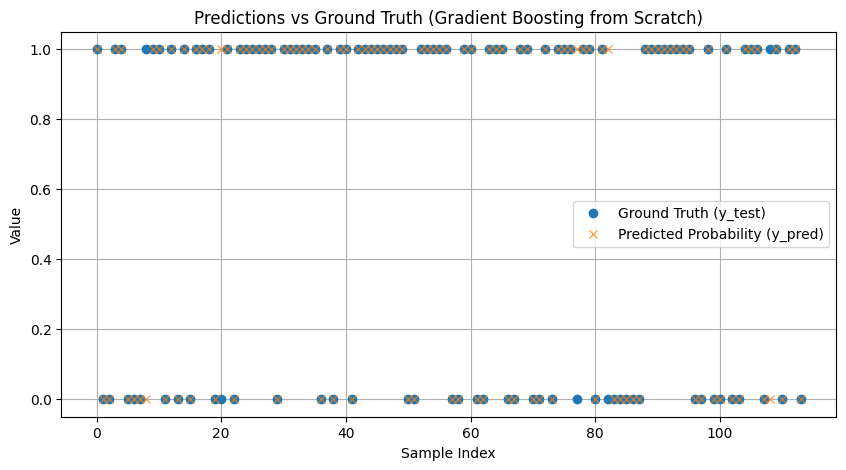

In [22]:
# plot predictions vs. the ground truth:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.title("Predictions vs Ground Truth (Gradient Boosting from Scratch)")
plt.plot(y_test, 'o', label='Ground Truth (y_test)')
plt.plot(y_pred, 'x', label='Predicted Probability (y_pred)', alpha=0.7) # Changed preds to y_pred
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.legend()
plt.grid(True)
plt.show()